## From HW4, Assignment 4

In [34]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import scipy.stats

%pylab inline

DEBUG = False

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUIDATA')

'/home/cusp/lag552/PUIdata'

In [3]:
!curl -O 'https://s3.amazonaws.com/tripdata/201412-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.1M  100 12.1M    0     0  20.6M      0 --:--:-- --:--:-- --:--:-- 27.9M


In [4]:
!unzip 201412-citibike-tripdata.zip

Archive:  201412-citibike-tripdata.zip
  inflating: 201412-citibike-tripdata.csv  


In [5]:
df = pd.read_csv('201412-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,16047,Customer,NaN,0
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,498,Broadway & W 32 St,40.748549,-73.988084,546,E 30 St & Park Ave S,40.744449,-73.983035,18472,Subscriber,1988.0,2
2,450,12/1/2014 00:01:22,12/1/2014 00:08:52,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,19589,Subscriber,1983.0,1
3,1126,12/1/2014 00:02:17,12/1/2014 00:21:03,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,21142,Customer,NaN,0
4,331,12/1/2014 00:02:21,12/1/2014 00:07:52,519,Pershing Square North,40.751873,-73.977706,527,E 33 St & 2 Ave,40.744023,-73.976056,18679,Subscriber,1986.0,2


In [7]:
# Needed to convert date and time values for this function to work
# Source: http://stackoverflow.com/questions/5045210/how-to-remove-unconverted-data-from-a-python-datetime-object
df['date'] = pd.to_datetime(df['starttime'], format="%m/%d/%Y %H:%M:%S")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,16047,Customer,NaN,0,2014-12-01 00:00:28
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,498,Broadway & W 32 St,40.748549,-73.988084,546,E 30 St & Park Ave S,40.744449,-73.983035,18472,Subscriber,1988.0,2,2014-12-01 00:00:43
2,450,12/1/2014 00:01:22,12/1/2014 00:08:52,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,19589,Subscriber,1983.0,1,2014-12-01 00:01:22
3,1126,12/1/2014 00:02:17,12/1/2014 00:21:03,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,21142,Customer,NaN,0,2014-12-01 00:02:17
4,331,12/1/2014 00:02:21,12/1/2014 00:07:52,519,Pershing Square North,40.751873,-73.977706,527,E 33 St & 2 Ave,40.744023,-73.976056,18679,Subscriber,1986.0,2,2014-12-01 00:02:21


In [8]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# BY GENDER

## splitting data by gender and extracting the age happens in the cell below

In [9]:
df['ageM'] = 2014 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2014- df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [10]:
#dropping some data I no longer need
df.drop(['start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype'], 
        axis=1, inplace=True)
df.head()

,tripduration,starttime,stoptime,birth year,gender,date,ageM,ageF
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,NaN,0,2014-12-01 00:00:28,NaN,NaN
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,1988.0,2,2014-12-01 00:00:43,NaN,26.0
2,450,12/1/2014 00:01:22,12/1/2014 00:08:52,1983.0,1,2014-12-01 00:01:22,31.0,NaN
3,1126,12/1/2014 00:02:17,12/1/2014 00:21:03,NaN,0,2014-12-01 00:02:17,NaN,NaN
4,331,12/1/2014 00:02:21,12/1/2014 00:07:52,1986.0,2,2014-12-01 00:02:21,NaN,28.0


In [11]:
# dropping nan values
df['ageM'].dropna(inplace = True)
df['ageF'].dropna(inplace = True)

In [12]:
df['ageM'].head()

2    31.0
5    41.0
6    28.0
7    24.0
8    32.0
Name: ageM, dtype: float64

In [13]:
df['ageF'].head()

1     26.0
4     28.0
17    23.0
18    25.0
23    61.0
Name: ageF, dtype: float64

## HISTOGRAMS

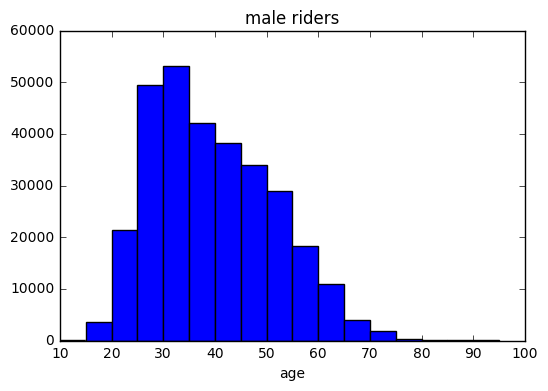

In [24]:
pl.hist(df['ageM'], bins = np.arange(10, 99, 5))
pl.title('male riders')
pl.xlabel('age')

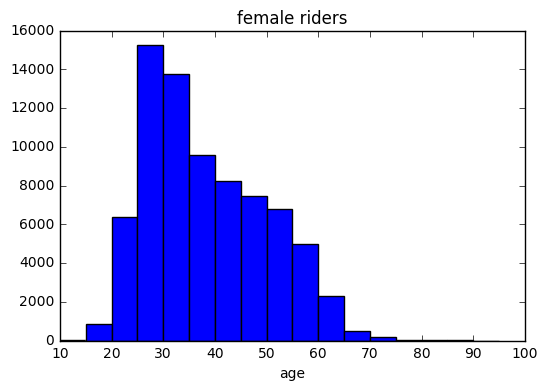

In [25]:
pl.hist(df['ageF'], bins = np.arange(10, 99, 5))
pl.title('female riders')
pl.xlabel('age')

## OR more complicated:

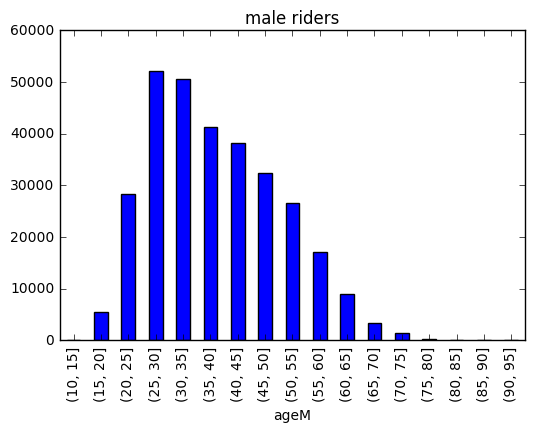

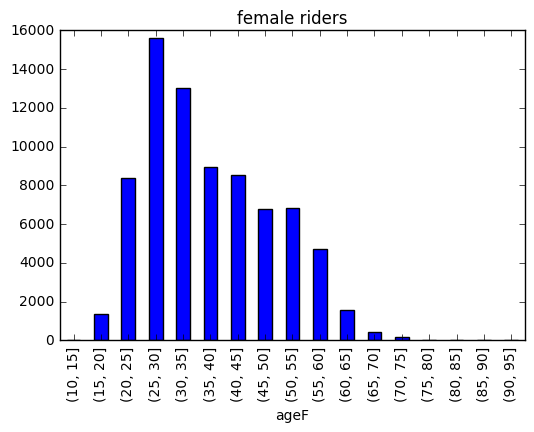

In [19]:
bins = np.arange(10, 99, 5)
#np.arange(start, stop, step)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000336
(20, 25]       0.017099
(25, 30]       0.051402
(30, 35]       0.057089
(35, 40]       0.039496
(40, 45]       0.026017
(45, 50]       0.008453
(50, 55]       0.011401
(55, 60]       0.017416
(60, 65]       0.008448
(65, 70]       0.002904
(70, 75]       0.000538
(75, 80]       0.000026
(80, 85]       0.000056
(85, 90]       0.000036
(90, 95]       0.000000


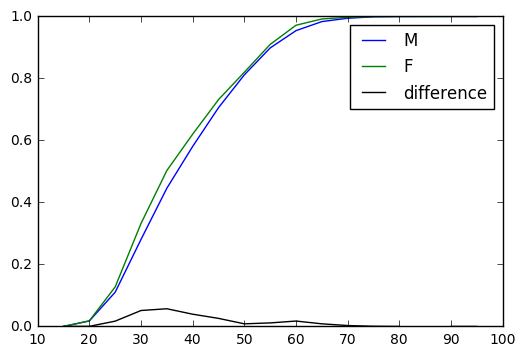

In [20]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")

pl.legend()

# KS TEST

We use the KS tests to compare 2 samples and evaluate whether we can say if they are samples extracted from the same distribution.

## **Null H: The samples are drawn from the same parent distribution.**

*Hypotheses Statements: K-S Test*

Null Hypothesis: The independent samples of male and female Citi Bike users have (are drawn from) the same age distribution, alpha = 0.05.

Alternative Hypothesis: The independent samples of male and female Citi Bike users have (are drawn from) different age distributions. 

## Entire Dataset

In [29]:
alpha = 0.05

In [26]:
# Remove ages over 70
ks = scipy.stats.ks_2samp(df.ageM[df.ageM<70], df.ageF[df.ageF<70])
print (ks)

Ks_2sampResult(statistic=0.056545419903070215, pvalue=1.2168674061214872e-169)


In [27]:
#ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
#print (ks)

In [30]:
def printRejection(ksp, pv):
    print ("the Null hypothesis that the samples come from identical distributions ")

    if ksp > pv: 
        print ("cannot be rejected")
    else: 
        print ("is rejected (p<{:.2f})".format(pv))
printRejection(ks[1], alpha)

the Null hypothesis that the samples come from identical distributions 
is rejected (p<0.05)


## Reduced Dataset (200)

I redo the test with a subsample of the data: take only 1 ride every of 200

In [31]:
ks = scipy.stats.ks_2samp(df.ageM[::200], df.ageF[::200])
print (ks)
printRejection(ks[1], alpha)

Ks_2sampResult(statistic=0.066496592242007213, pvalue=0.12873759446361471)
the Null hypothesis that the samples come from identical distributions 
cannot be rejected


## **Hypotheses Statements: Pearson's AND Spearman's Test**

### Null Hypothesis: The two datasets are NOT significantly correlated

**Null Hypothesis:** The ages of male and female Citi Bike users **are not significantly correlated,** alpha = 0.05.

Alternative Hypothesis: The ages of male and female Citi Bike users are significantly correlated.

# Pearson's Test

### NEED TO SORT AND MAKE DATASETS THE SAME SIZE because a paired test

Pearson's r (0.99781991836447714, 0.0)
Pearson's r with reducted data (0.99781991836447714, 0.0)


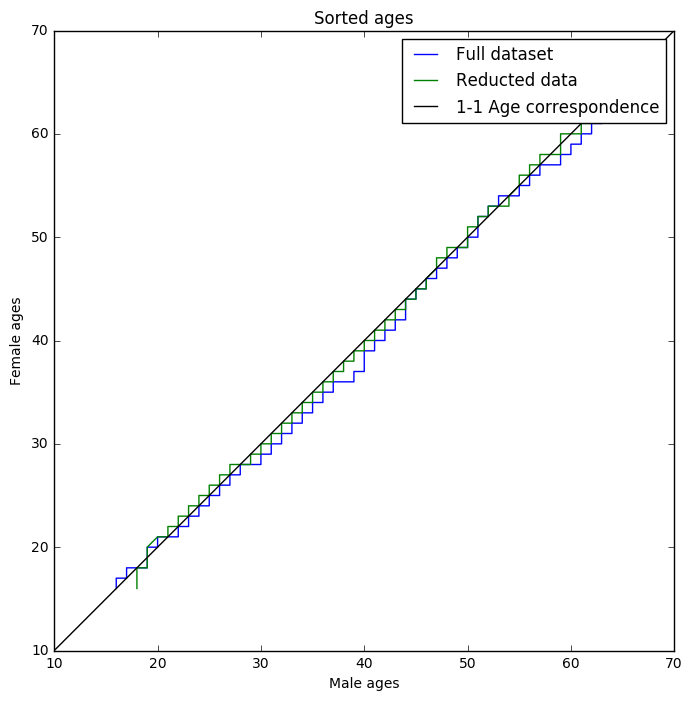

In [36]:
# the samples need to be cleaned off nan values 
# the samples need to be made to the same size. 
# The best option for that (least likely to bias the result) is to 
# choose Nf out of Nm values at random

np.random.seed(12345)
ageFsorted = np.sort(df.ageF[df.ageF<70])
#Same as this: 
#ageFsorted = df.ageF.sort_values()[df.ageF<70]

# do the following to take a random number of the male set so it's the same length as the female set
ageMsorted = np.sort(np.random.choice(df.ageM[df.ageM<70], len(ageFsorted), replace=False))
if DEBUG: 
    print (len(ageFsorted), len(ageMsorted))

pearson = scipy.stats.pearsonr(ageMsorted, ageFsorted)
print  ("Pearson's r" , pearson)

pl.figure(figsize=(8, 8))
pl.plot(ageMsorted, ageFsorted, label = "Full dataset")



# this was not explicitly asked but I am redoing the test with the smaller dataset

ageFsorted_short = df.ageF.sort_values()[df.ageF<70][::200]
ageMsorted_short = np.sort(np.random.choice(df.ageM[df.ageM<70][::200], len(ageFsorted_short), replace=False))

pearson = scipy.stats.pearsonr(ageMsorted, ageFsorted)
print  ("Pearson's r with reducted data" , pearson)

pl.plot(ageMsorted_short, ageFsorted_short, label = "Reducted data")

#1-1 line
pl.plot(pl.xlim(), pl.xlim(), 'k-', label="1-1 Age correspondence")

pl.xlabel("Male ages")
pl.ylabel("Female ages")
title = pl.title("Sorted ages")
leg = pl.legend()

# Spearman's Test

In [38]:
spearman = scipy.stats.spearmanr(ageMsorted, ageFsorted)
print  (spearman)

SpearmanrResult(correlation=0.99916626406913611, pvalue=0.0)


# BY DAY AND NIGHT

I am choosing day/night cuts as follows:

day: 5AM to 18PM trip start time
night: 18PM to 5AM trip start time

In [42]:
df.head()

,tripduration,starttime,stoptime,birth year,gender,date,ageM,ageF,hour
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,NaN,0,2014-12-01 00:00:28,NaN,NaN,0
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,1988.0,2,2014-12-01 00:00:43,NaN,26.0,0
2,450,12/1/2014 00:01:22,12/1/2014 00:08:52,1983.0,1,2014-12-01 00:01:22,31.0,NaN,0
3,1126,12/1/2014 00:02:17,12/1/2014 00:21:03,NaN,0,2014-12-01 00:02:17,NaN,NaN,0
4,331,12/1/2014 00:02:21,12/1/2014 00:07:52,1986.0,2,2014-12-01 00:02:21,NaN,28.0,0


In [43]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'birth year', 'gender', 'date',
       'ageM', 'ageF', 'hour'],
      dtype='object')

In [40]:
df['hour'] = df['date'].map(lambda ts: ts.hour)
# lamda - if timestamp, make the timestamp hour
# map - applies said function to all 

In [54]:
dayrider = df[(df['hour'].values > 5) + (df['hour'].values < 18)]
nightrider = df[(df['hour'].values < 5) + (df['hour'].values > 18)]
ageD = 2014 - dayrider['birth year']
ageN = 2014 - nightrider['birth year']

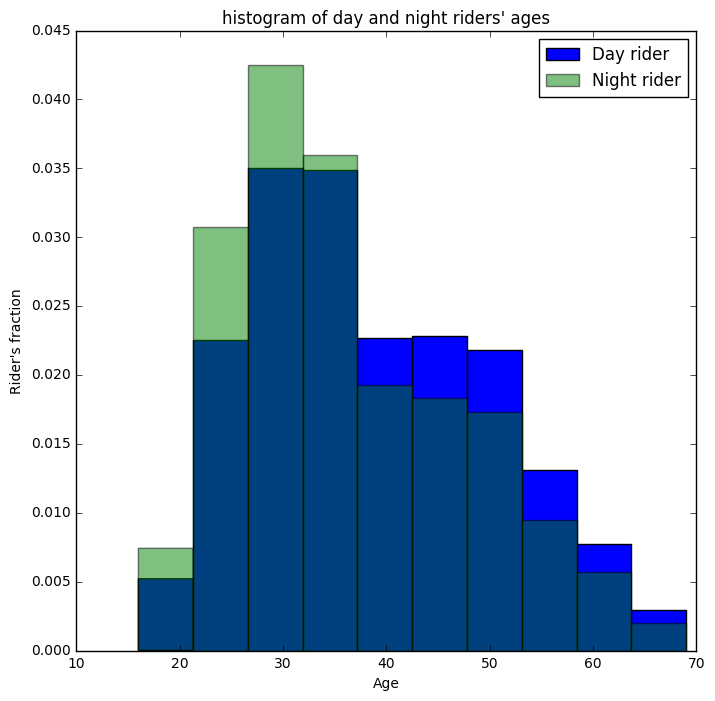

In [55]:
pl.figure(figsize = (8, 8))
h1 = pl.hist(ageD[ageD < 70], label = "Day rider", normed=True)
h2 = pl.hist(ageN[ageN < 70], label = "Night rider", normed=True, alpha = 0.5)
title = pl.title("histogram of day and night riders' ages")
leg = pl.legend()
pl.xlabel('Age')
pl.ylabel("Rider's fraction")

In [56]:
# KStest for day vs. night riders, under 70 years old, every 200 sampled
ks_dn = scipy.stats.ks_2samp(ageD[ageD < 70][::200], ageN[ageN < 70][::200])
print (ks_dn)

Ks_2sampResult(statistic=0.090328385065227113, pvalue=0.014805590929886011)


In [58]:
printRejection(ks_dn[1], alpha)

the Null hypothesis that the samples come from identical distributions 
is rejected (p<0.05)


Remember from earlier:
    
def printRejection(ksp, pv):
    print ("the Null hypothesis that the samples come from identical distributions ")

    if ksp > pv: 
        print ("cannot be rejected")
    else: 
        print ("is rejected (p<{:.2f})".format(pv))
printRejection(ks[1], alpha)